### Validation of FUTURES Simulations  

This Notebook discusses results from FUTURES simulations with and without zoning parameters included in the POTENTIAL submodel.

In [1]:
import pickle
import matplotlib.pyplot as plt
from helper_results import results_table, plot_hit_miss, plot_quant_alloc_error

Open results exported from futures_pga.ipynb

In [2]:
with open("results//metrics_sub", "rb") as pf:
  metrics_sub = pickle.load(pf)
with open("results//metrics", "rb") as pf:
  metrics_core = pickle.load(pf)
with open("results//metrics_base", "rb") as pf:
  metrics_base = pickle.load(pf)

Create results table from metrics dictionary

In [3]:
metrics_base_tab = results_table(metrics_base)
metrics_core_tab = results_table(metrics_core)
metrics_sub_tab = results_table(metrics_sub)

### Figure of Merit

Figure of merit is a measure of agreement between observed and simulated change. Perfect agreement would be 100% while 0% represents no match.  

We find low FoM of all methods (around 2.5) with marginal differences (+- 0.1). The base method (no zoning) performs the best while the core-zoning method performs the worse. However, more tests are needed to determine the best method. For example, we could explore the range of FoM for all 50 stochastic runs and assess statistical difference between the distributions of FoM. Additionally, alternative methods for FUTURES calibration could be explored. For this experiment, I calibrated the model using the base POTENTIAL parameterization for all simulations. The rationale was to limit difference between simulations to purely the POTENTIAL model. However, a better method would have been to calibrate for all POTENTIAL methods and then choose calibration values that produced intermediate calibration for all methods. Additionally, further exploration of how FoM varies across the landscape would benefit the analysis.

In [4]:
print("base figure of merit: " + str(round(metrics_base_tab["figure_of_merit"].mean(), 4)))
print("core figure of merit: " + str(round(metrics_core_tab["figure_of_merit"].mean(), 4)))
print("sub figure of merit: " + str(round(metrics_sub_tab["figure_of_merit"].mean(), 4)))

base figure of merit: 2.5803
core figure of merit: 2.4769
sub figure of merit: 2.5508


### Hits, Misses, and False Alarms

We further explore FUTURES performance by calculating misses (incorrectly simulated persistence), hits (correctly simulated change), and false alarms(incorrectly simulated change). Additionally, we plot null successes (correctly simulated persistence, that is no chang) and percentage of landscape that is initially developed.  

Again, we see little variation between methods. The Base method slightly outperforms the other methods with slightly more hits (0.17%) and fewer misses (4.00%) compared to 0.16% and 4.01% respectively. However, the sub method has the highest rate of null successes (73.69%) and lowest rate of false alarms (2.15%), meaning it correctly determines more persistence and has slightly lower incorrectly predicted development than the other methods.

For all methods, we have greater amount of misses (~4%) than false alarms (~2.2%), meaning we underestimated growth for the counties within the Central Pines Regional Council.

C:\Users\malawrim\AppData\Local\Temp\ipykernel_18424\2307428218.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap("Set3", 5)


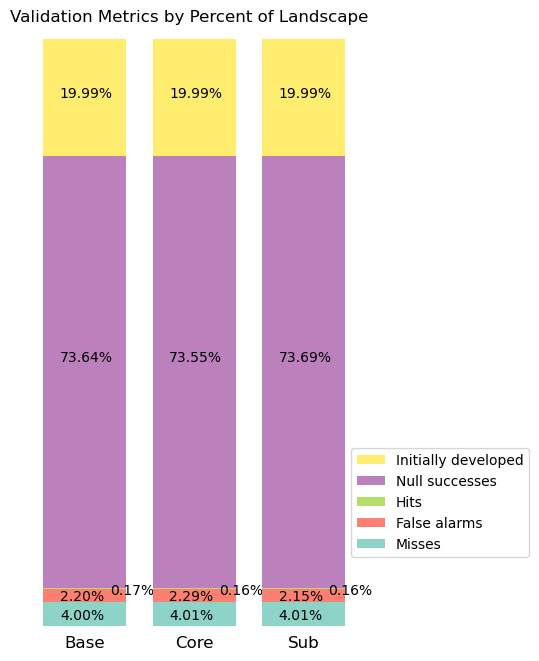

In [5]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
cmap = plt.cm.get_cmap("Set3", 5)
fig.suptitle('Validation Metrics by Percent of Landscape', y=0.88)
fig.set_size_inches(4, 8)
tab = metrics_sub_tab
ax1 = plot_hit_miss(ax1, metrics_base_tab, cmap)
ax1.set_title('Base', loc='center', y = -0.05)
ax1.axis("off")
ax2 = plot_hit_miss(ax2, metrics_core_tab, cmap)
ax2.set_title('Core', loc='center', y = -0.05)
ax2.axis("off")
ax3 = plot_hit_miss(ax3, metrics_sub_tab, cmap)
ax3.set_title('Sub', loc='center', y = -0.05)
ax3.axis("off")
handles, labels = ax1.get_legend_handles_labels()
labels = ["Initially developed", "Null successes", "Hits", "False alarms", "Misses"]
plt.legend(handles[::-1], labels, loc='center right', bbox_to_anchor=(3.05, 0.2))

### Quantity and Allocation Error  

Finally, we determine the type (quantity or allocation) of the simulated error (misses + false alarms). Quantity error indicates disagreement between amounts of observed and simulated change. Allocation error is a measure of accuracy in predicting locations of observed change.  

In all cases, the majority of the error (4.30-4.58%) is allocation meaning incorrect locations were simulated. The lower quantity error indicates that we more accurately predicted the amount of development and less accurately predicted the location of development. We slightly higher allocation error (4.58%) and slightly lower quantity error (1.72%) using the core method and slightly lower allocation error (4.30%) and higher quantity error (1.86%) for the sub method.

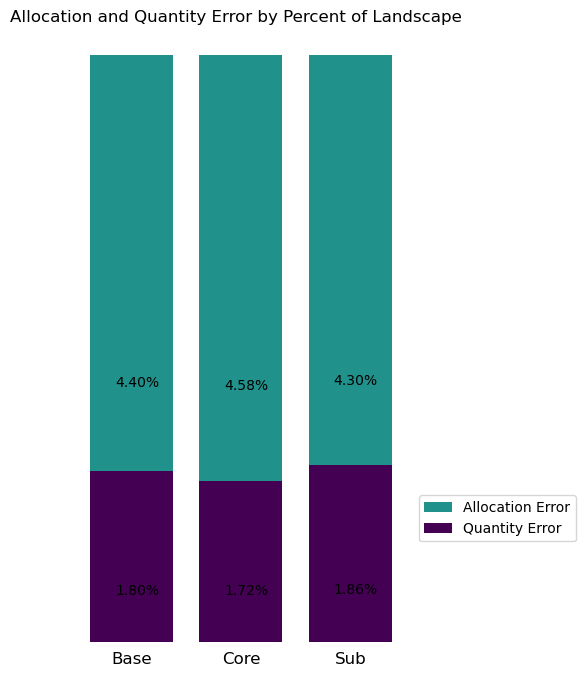

In [6]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)

fig.suptitle('Allocation and Quantity Error by Percent of Landscape', y=0.9)
fig.set_size_inches(4, 8)
tab = metrics_sub_tab
ax1 = plot_quant_alloc_error(ax1, metrics_base_tab)
ax1.set_title('Base', loc='center', y = -0.05)
ax1.axis("off")
ax2 = plot_quant_alloc_error(ax2, metrics_core_tab)
ax2.set_title('Core', loc='center', y = -0.05)
ax2.axis("off")
ax3 = plot_quant_alloc_error(ax3, metrics_sub_tab)
ax3.set_title('Sub', loc='center', y = -0.05)
ax3.axis("off")

handles, labels = ax1.get_legend_handles_labels()
labels = ["Quantity Error", "Allocation Error"]

plt.legend(handles[::-1], labels[::-1], loc='center right', bbox_to_anchor=(3.05, 0.2))

### References

Sanchez, G. M., Petrasova, A., Skrip, M. M., Collins, E. L., Lawrimore, M. A., Vogler, J. B., Terando, A., Vukomanovic, J., Mitasova, H., & Meentemeyer, R. K. (2023). Spatially interactive modeling of land change identifies location-specific adaptations most likely to lower future flood risk. Scientific Reports, 13(1), Article 1. https://doi.org/10.1038/s41598-023-46195-9